<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-02-03-Ensemble/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Notes](https://1drv.ms/u/s!AmSu_rSXl5m3iSQr2MckZa36MYSJ?e=jV7Y61)

# Voting Classifier

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
X, Y = make_moons(n_samples = 500, shuffle = True, noise = 0.1)
X.shape, Y.shape

((500, 2), (500,))

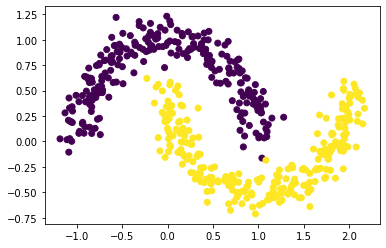

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC(probability=True)

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
              ('logistic', log),
              ('knn', knn),
              ('tree', tree),
              ('nb', nb),
              # ('svc', svc)
]

vclf = VotingClassifier(estimators = estimators, voting = 'soft')

bahuballi ->>  99%

mera nam surya  67%

mera nam surya  57%

In [ ]:
from sklearn.metrics import accuracy_score

est = [log, knn, tree, nb, svc, vclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

LogisticRegression 0.88
KNeighborsClassifier 1.0
DecisionTreeClassifier 0.992
GaussianNB 0.872
SVC 1.0
VotingClassifier 0.968


# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tclf = DecisionTreeClassifier()
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100)

In [ ]:
from sklearn.metrics import accuracy_score

est = [tclf, bclf]

for model in est:
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    print(model.__class__.__name__ ,accuracy_score(y_pred, ytest))

DecisionTreeClassifier 0.992
BaggingClassifier 0.984


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


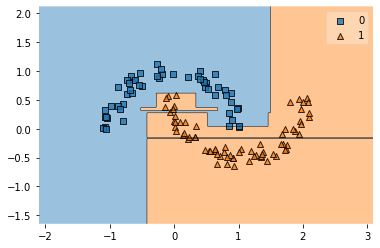

In [ ]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(xtest, ytest, clf = tclf)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


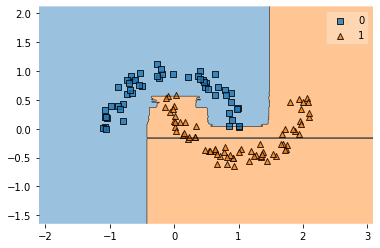

In [ ]:
plot_decision_regions(xtest, ytest, clf = bclf)

# Pasting

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, bootstrap=False)
bclf.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  n_estimators=100)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


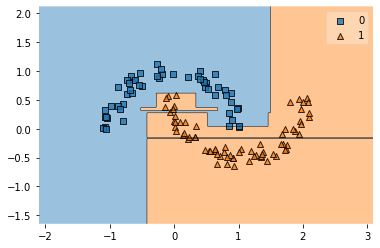

In [ ]:
plot_decision_regions(xtest, ytest, clf = bclf)

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100, oob_score=True)
bclf.fit(X, Y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  oob_score=True)

In [ ]:
bclf.oob_score_

0.986

# Warm Start

In [ ]:
! pip install tqdm 

In [ ]:
bclf = BaggingClassifier(DecisionTreeClassifier(), warm_start = True)

In [ ]:
from tqdm.notebook import tqdm, trange

tests = []
trains = []

bclf.n_estimators = 0
for i in tqdm(range(10)):
    bclf.n_estimators = bclf.n_estimators + 1
    bclf.fit(xtrain, ytrain)
    
    testscore = bclf.score(xtest, ytest)
    trainscore = bclf.score(xtrain, ytrain)
    tests.append(testscore)
    trains.append(trainscore)

  0%|          | 0/10 [00:00<?, ?it/s]

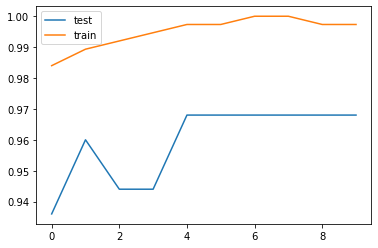

In [ ]:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')

plt.legend()

**Best result is at index 2 estimators**

In [ ]:
model = bclf.estimators_[2]
bclf.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:375: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  "Warm-start fitting without increasing n_estimators does not "


BaggingClassifier(base_estimator=DecisionTreeClassifier(), warm_start=True)

In [ ]:
bclf.score(xtest, ytest), bclf.score(xtrain, ytrain)

(0.968, 0.9973333333333333)

# Random Forest

row sampling + col sampling

variance reduces even more than Bagging

Bias increases slightly

In [ ]:
xtrain.shape

(375, 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(DecisionTreeClassifier(), bootstrap_features = True, max_features=0.5, n_jobs=-1)

In [ ]:
bag.fit(xtrain, ytrain)

BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_features=0.5, n_jobs=-1)

In [ ]:
from sklearn import tree

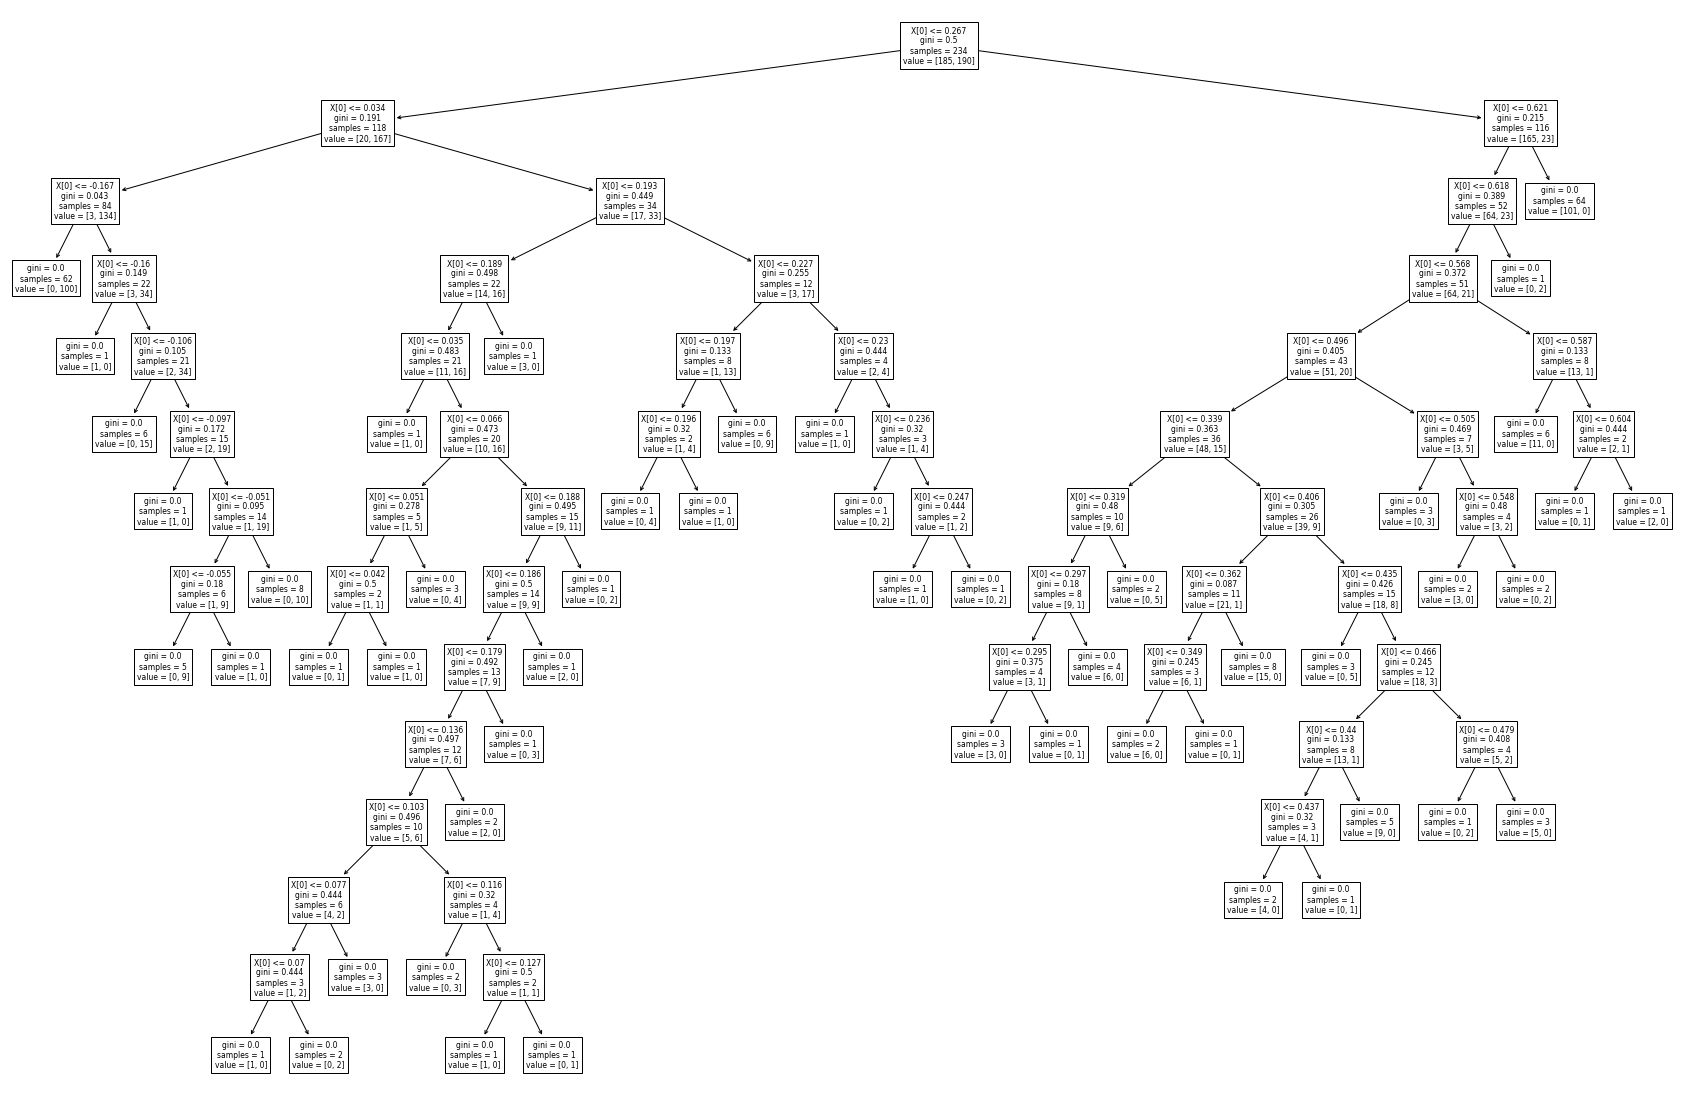

In [ ]:
plt.figure(figsize = (30, 20))

tree.plot_tree(bag.estimators_[1])
plt.show()

## Extra Tree

random selection of tau

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

tree = ExtraTreesClassifier()

In [ ]:
tree.fit(xtrain, ytrain)
tree.score(xtest, ytest)

1.0

In [ ]:
bag.fit(xtrain, ytrain)
bag.score(xtest, ytest)

0.776

In [ ]:
print('bag', bag.score(xtrain, ytrain))
print('extra', tree.score(xtrain, ytrain))

bag 0.9946666666666667
extra 1.0


# Boosting

## AdaBoost

In [3]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

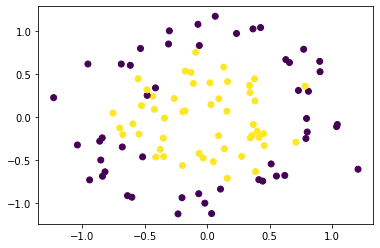

In [ ]:
X, y = make_circles(n_samples = 100, noise = 0.15, factor = 0.5)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(clf, X, y, cv=5)
print(res)
print(res.mean())

[0.9  0.8  0.75 0.85 0.95]
0.85


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1.0, n_estimators= 75)

In [ ]:
from sklearn.model_selection import cross_val_score

res = cross_val_score(clf, X, y, cv=5)
print(res)
print(res.mean())

[0.95 0.8  0.8  0.9  0.95]
0.8799999999999999


In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [5, 10, 25, 50, 100],
    'learning_rate': [1.0, 0.01, 0.001, 0.0001],
    'algorithm': ['SAMME.R', 'SAMME']
}

gs = GridSearchCV(clf, param)
gs.fit(X, y)

GridSearchCV(estimator=AdaBoostClassifier(algorithm='SAMME'),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 0.01, 0.001, 0.0001],
                         'n_estimators': [5, 10, 25, 50, 100]})

In [ ]:
gs.best_score_, gs.best_params_

(0.8699999999999999,
 {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50})

In [ ]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [40, 50, 75],
    'learning_rate': [1.0, 0.01, 0.02, 0.03],
    'algorithm': ['SAMME.R', 'SAMME']
}

gs = GridSearchCV(clf, param)
gs.fit(X, y)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ['SAMME.R', 'SAMME'],
                         'learning_rate': [1.0, 0.01, 0.02, 0.03],
                         'n_estimators': [40, 50, 75]})

In [ ]:
gs.best_score_, gs.best_params_

(0.8799999999999999,
 {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 75})

In [ ]:
clf.n_estimators

75

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


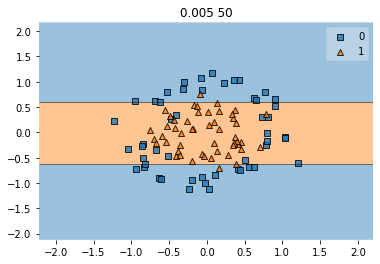

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


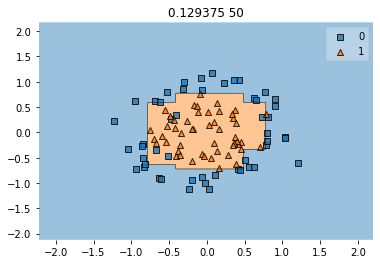

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


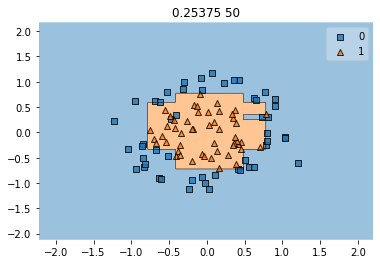

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


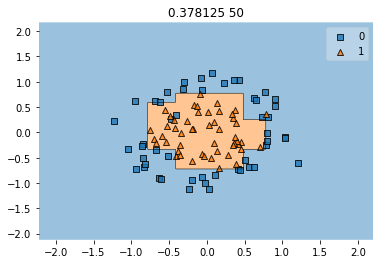

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


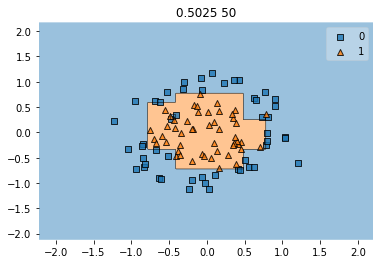

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


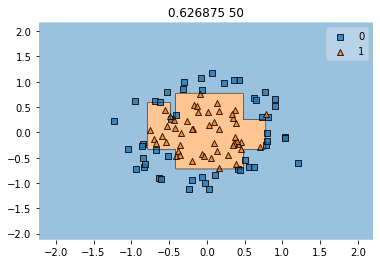

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


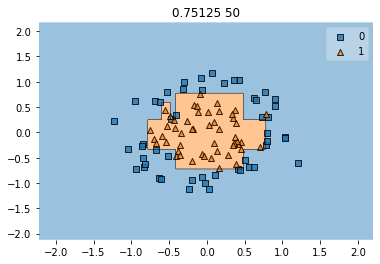

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


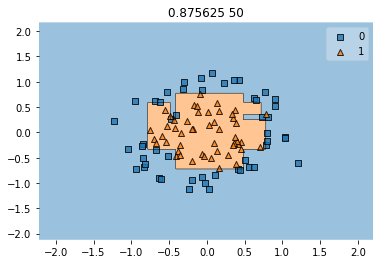

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


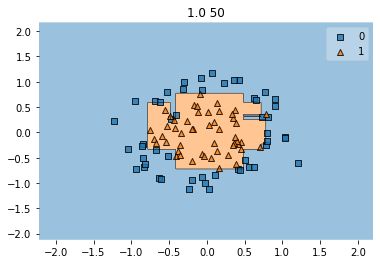

In [ ]:
from mlxtend.plotting import plot_decision_regions

# plt.subplot(3, 3, 1)
# plt.figure(figsize = (10, 25))
for i, lr in enumerate(np.linspace(0.005, 1, 9)):
    # plt.subplot(3, 3, i+1)
    clf = AdaBoostClassifier(learning_rate = lr)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf = clf)
    plt.title('{} {}'.format(lr, clf.n_estimators))
    plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


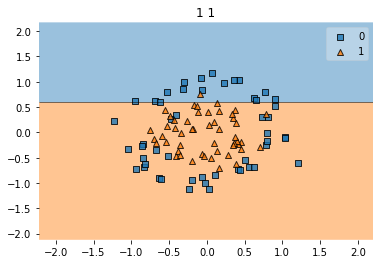

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


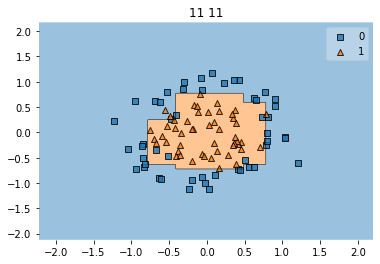

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


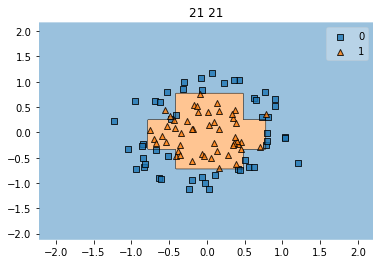

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


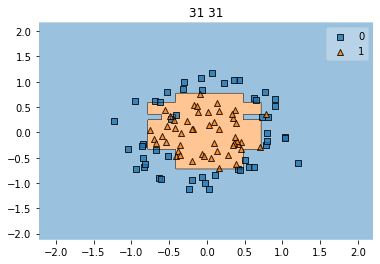

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


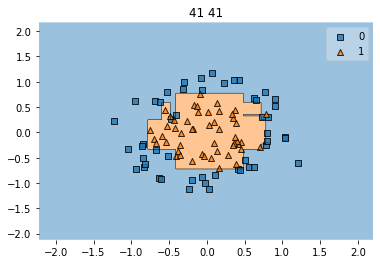

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


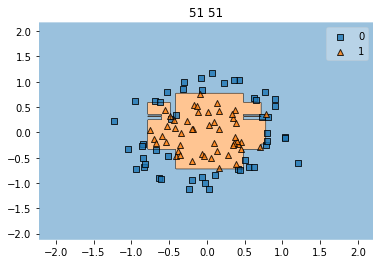

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


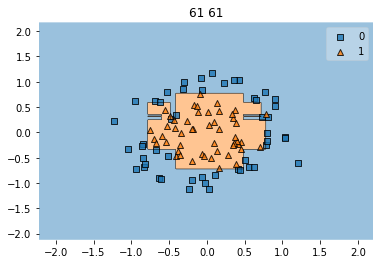

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


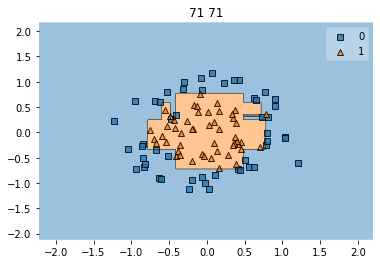

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


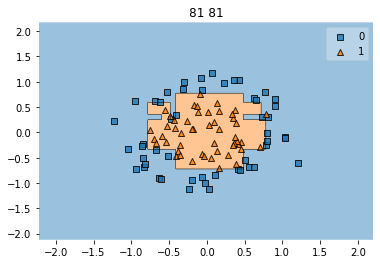

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


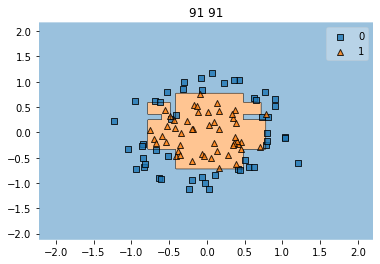

In [ ]:
from mlxtend.plotting import plot_decision_regions

# plt.subplot(3, 3, 1)
# plt.figure(figsize = (10, 25))
for i, lr in enumerate(range(1, 100, 10)):
    # plt.subplot(3, 3, i+1)
    clf = AdaBoostClassifier(n_estimators = lr)
    clf.fit(X, y)
    plot_decision_regions(X, y, clf = clf)
    plt.title('{} {}'.format(lr, clf.n_estimators))
    plt.show()

## Gradient Boosting

In [4]:
from sklearn.datasets import make_friedman1

X, y = make_friedman1(n_samples = 1000)

In [6]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

  0%|          | 0/2000 [00:00<?, ?it/s]

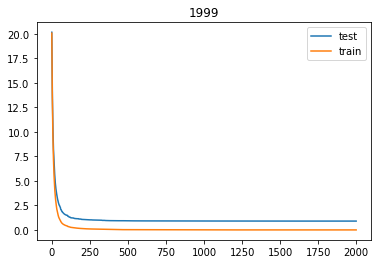

In [24]:
from tqdm.notebook import tqdm, trange
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(warm_start = True)
tests = []
trains = []

gbr.n_estimators = 0
for i in tqdm(range(2000)):
    gbr.n_estimators = gbr.n_estimators + 1
    gbr.fit(xtrain, ytrain)
    
    testscore = mean_squared_error(gbr.predict(xtest), ytest)
    trainscore = mean_squared_error(gbr.predict(xtrain), ytrain)
    tests.append(testscore)
    trains.append(trainscore)

    # if i % 100 == 0:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')
plt.legend()
plt.title(i)
plt.show()

  0%|          | 0/2000 [00:00<?, ?it/s]

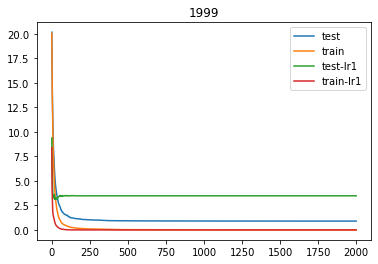

In [25]:
from tqdm.notebook import tqdm, trange
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(warm_start = True, learning_rate=1.0)

testslr1 = []
trainslr1 = []

gbr.n_estimators = 0
for i in tqdm(range(2000)):
    gbr.n_estimators = gbr.n_estimators + 1
    gbr.fit(xtrain, ytrain)
    
    testscore = mean_squared_error(gbr.predict(xtest), ytest)
    trainscore = mean_squared_error(gbr.predict(xtrain), ytrain)
    testslr1.append(testscore)
    trainslr1.append(trainscore)

    # if i % 100 == 0:
plt.plot(tests, label = 'test')
plt.plot(trains, label = 'train')
plt.plot(testslr1, label = 'test-lr1')
plt.plot(trainslr1, label = 'train-lr1')
plt.legend()
plt.show()